In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pylab import *
from sklearn.model_selection import train_test_split

##use mse and accuracy to evaluate model
##split dataset into training data and validation data with ratio 8:2

In [ ]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

#X = X.drop(['PERIOD','GAME_CLOCK','PTS_TYPE','CLOSE_DEF_DIST','SHOT_CLOCK'], axis=1)

X_test = pd.read_csv('X_test.csv')

X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_valid_std = sc_x.fit_transform(X_valid)
X_test_std = sc_x.fit_transform(X_test)

##把所有x cloumn的值與要預測的y個別印出分布關係，來決定要選哪些features

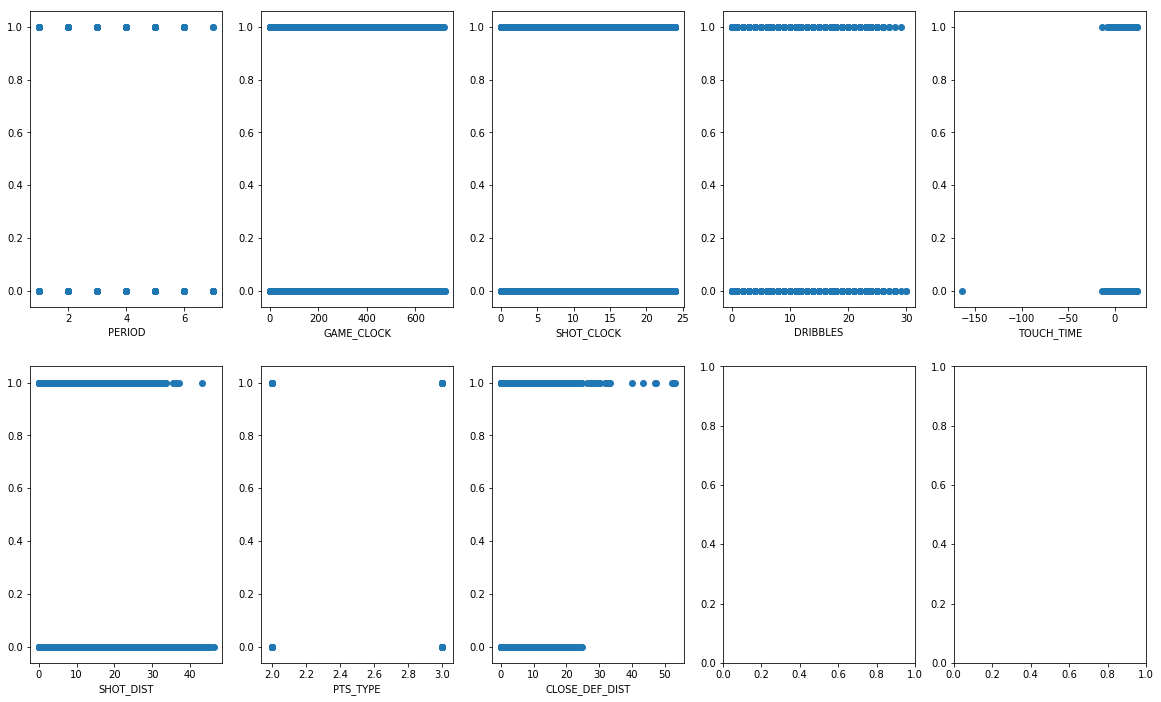

In [14]:
#feature selection 
x_vars = [
    'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'
]

_, subplot_arr = plt.subplots(2, 5, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
  x_idx = idx // 5
  y_idx = idx % 5
  subplot_arr[x_idx, y_idx].scatter(X[x_var], y['FGM'])
  subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

##selected model: polynomial regression with Lasso (alpha = 0.001) and test model complexity
output_threshold function 將 predict 出來的結果，轉成 0 和 1 ，用來幫助計算 accuracy (Theshold 設為 0.5，因為值是在 0~1 之間)

In [16]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv

def output_threshold(pred):
    #print(pred)
    #print(len(pred))
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    #print(pred)
    return pred
    
maxdegree = 7
a = [0.001, 0.01, 0.1, 1, 10]

mse_train = []
mse_valid = []
accuracy_train = []
accuracy_valid = []

for d in range(1, maxdegree + 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_std)
    X_valid_poly = poly.fit_transform(X_valid_std)
    X_test_poly = poly.fit_transform(X_test_std)
    
    rg = Lasso(alpha=a[0])
    rg.fit(X_train_poly, y_train)
    
    y_train_pred = rg.predict(X_train_poly)
    y_valid_pred = rg.predict(X_valid_poly)
    y_test_pred = rg.predict(X_test_poly)
    
    train_y = np.copy(y_train_pred)
    valid_y = np.copy(y_valid_pred)
    test_y = np.copy(y_test_pred)
    
    y_train_output = output_threshold(train_y)
    y_valid_output = output_threshold(valid_y)
    
    if d == 4:
        y_test_output = output_threshold(test_y)
        name=['FGM']
        test=pd.DataFrame(columns=name,data=y_test_output)
        test.to_csv('y_test.csv',encoding='gbk')
        
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_valid.append(mean_squared_error(y_valid, y_valid_pred))
   
    print('\n[Degree = %d]' % d)
    print('Training Accuracy : %f' % accuracy_score(y_train, y_train_output))
    print('Validation Accuracy : %f' % accuracy_score(y_valid, y_valid_output))
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred))) 
    
    accuracy_train.append(accuracy_score(y_train, y_train_output))
    accuracy_valid.append(accuracy_score(y_valid, y_valid_output))


[Degree = 1]
Training Accuracy : 0.606097
Validation Accuracy : 0.613454
MSE train: 0.23, valid: 0.23

[Degree = 2]
Training Accuracy : 0.614471
Validation Accuracy : 0.620134
MSE train: 0.23, valid: 0.23


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4020.779036545843, tolerance: 1.0400774350533182
  positive)



[Degree = 3]
Training Accuracy : 0.619433
Validation Accuracy : 0.621279
MSE train: 0.23, valid: 0.23


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4783.448532167566, tolerance: 1.0400774350533182
  positive)



[Degree = 4]
Training Accuracy : 0.621556
Validation Accuracy : 0.621660
MSE train: 0.23, valid: 0.23


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4812.685939691996, tolerance: 1.0400774350533182
  positive)



[Degree = 5]
Training Accuracy : 0.623584
Validation Accuracy : 0.621279
MSE train: 0.23, valid: 0.23


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4788.104101708274, tolerance: 1.0400774350533182
  positive)



[Degree = 6]
Training Accuracy : 0.626399
Validation Accuracy : 0.619179
MSE train: 0.23, valid: 0.23


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4755.609200196916, tolerance: 1.0400774350533182
  positive)



[Degree = 7]
Training Accuracy : 0.630335
Validation Accuracy : 0.619847
MSE train: 0.22, valid: 0.24


##畫出mse及model complexity間的曲線圖
發現在degree = 3 時，validation 的 mse就不再下降反而上升
因此在這個case裡，polynomial 的 degree 若大於 3 ， training 可能就開始有 overfitting 的跡象

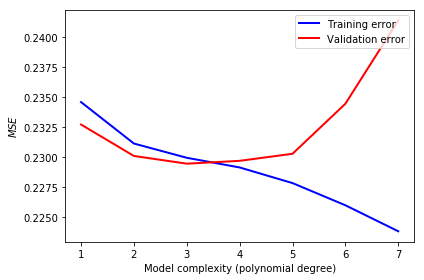

In [6]:
plt.plot(range(1, maxdegree + 1), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, maxdegree + 1), mse_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('fig-error-curve.png', dpi=300)
plt.show()

##畫出accuracy及model complexity間的曲線圖
發現在degree = 4 時，validation 的 accuracy 就不再上升，之後 degree 越高反而越低
代表 training 可能開始有 overfitting 的跡象

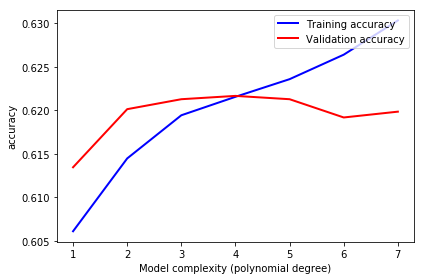

In [7]:
plt.plot(range(1, maxdegree + 1), accuracy_train, label = 'Training accuracy', color = 'blue', linewidth = 2)
plt.plot(range(1, maxdegree + 1), accuracy_valid, label = 'Validation accuracy', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('accuracy')
plt.tight_layout()
plt.savefig('fig-accuracy-curve.png', dpi=300)
plt.show()


##下面還測試過的model:
* polynomial regression degree 1 to 7 with Ridge 在 mse 及 accuracy 表現
* decision tree 在 max_depth 不同時的 accuracy 表現  
* random forest 在 n_estimators 不同時的 accuracy 表現

In [ ]:
#polynomial from degree 1 to 7 with Ridge regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def output_threshold(pred):
    #print(pred)
    #print(len(pred))
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
    #print(pred)
    return pred
    
maxdegree = 7
mse_train = []
mse_valid = []
    
for d in range(1, maxdegree + 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train_std)
    X_valid_poly = poly.fit_transform(X_valid_std)
    X_test_poly = poly.fit_transform(X_test_std)
    
    rg = Ridge(alpha=10000000)
    rg.fit(X_train_poly, y_train)
    
    y_train_pred = rg.predict(X_train_poly)
    y_valid_pred = rg.predict(X_valid_poly)
    train_y = np.copy(y_train_pred)
    valid_y = np.copy(y_valid_pred)
    
    y_train_output = output_threshold(train_y)
    y_valid_output = output_threshold(valid_y)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_valid.append(mean_squared_error(y_valid, y_valid_pred))
    
    print('\n[Degree = %d]' % d)
    print('training accuracy : %.2f' % accuracy_score(y_train, y_train_output))
    print('validation accuracy : %.2f' % accuracy_score(y_valid, y_valid_output))
    print('MSE train: %.2f, valid: %.2f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred))) 


[Degree = 1]
training accuracy : 0.54
validating accuracy : 0.55
MSE train: 0.25, valid: 0.25

[Degree = 2]
training accuracy : 0.54
validating accuracy : 0.55
MSE train: 0.25, valid: 0.25

[Degree = 3]
training accuracy : 0.54
validating accuracy : 0.55
MSE train: 0.25, valid: 0.25

[Degree = 4]
training accuracy : 0.55
validating accuracy : 0.55
MSE train: 0.25, valid: 0.25

[Degree = 5]
training accuracy : 0.57
validating accuracy : 0.56
MSE train: 0.24, valid: 0.24

[Degree = 6]
training accuracy : 0.58
validating accuracy : 0.58
MSE train: 0.24, valid: 0.24


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.2356e-20): result may not be accurate.
  overwrite_a=True).T



[Degree = 7]
training accuracy : 0.60
validating accuracy : 0.60
MSE train: 0.24, valid: 0.24


In [ ]:
plt.plot(range(1, maxdegree + 1), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, maxdegree + 1), mse_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.savefig('fig-error-curve1.png', dpi=300)
plt.show()

In [ ]:
plt.plot(range(1, maxdegree + 1), accuracy_train, label = 'Training accuracy', color = 'blue', linewidth = 2)
plt.plot(range(1, maxdegree + 1), accuracy_valid, label = 'Validation accuracy', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('accuracy')
plt.tight_layout()
plt.savefig('fig-accuracy-curve1.png', dpi=300)
plt.show()

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(1,14):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=i, 
                                  random_state=0)
    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_valid_pred = tree.predict(X_valid)
    
    print('Max depth: %d' % i)
    print('Training Accuracy: %.2f' % accuracy_score(y_train, y_train_pred))
    print('Validation Accuracy: %.2f\n' % accuracy_score(y_valid, y_valid_pred))

Max depth: 1
training Accuracy: 0.61
validating Accuracy: 0.61

Max depth: 2
training Accuracy: 0.61
validating Accuracy: 0.61

Max depth: 3
training Accuracy: 0.61
validating Accuracy: 0.61

Max depth: 4
training Accuracy: 0.61
validating Accuracy: 0.62

Max depth: 5
training Accuracy: 0.62
validating Accuracy: 0.62

Max depth: 6
training Accuracy: 0.62
validating Accuracy: 0.62

Max depth: 7
training Accuracy: 0.63
validating Accuracy: 0.62

Max depth: 8
training Accuracy: 0.63
validating Accuracy: 0.61

Max depth: 9
training Accuracy: 0.64
validating Accuracy: 0.61

Max depth: 10
training Accuracy: 0.64
validating Accuracy: 0.61

Max depth: 11
training Accuracy: 0.65
validating Accuracy: 0.60

Max depth: 12
training Accuracy: 0.67
validating Accuracy: 0.59

Max depth: 13
training Accuracy: 0.68
validating Accuracy: 0.59



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

n = [1,5,10,50,100]

for i in n:
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=i, 
                                    random_state=1,
                                    n_jobs=2)
    forest.fit(X_train, ravel(y_train))

    y_train_pred = forest.predict(X_train)
    y_valid_pred = forest.predict(X_valid)
    print('n_estimators: %d' % i)
    print('Training Accuracy: %.2f' % accuracy_score(y_train, y_train_pred))
    print('Validating Accuracy: %.2f\n' % accuracy_score(y_valid, y_valid_pred))

n_estimators: 1
Training Accuracy: 0.83
Validating Accuracy: 0.54

n_estimators: 5
Training Accuracy: 0.95
Validating Accuracy: 0.56

n_estimators: 10
Training Accuracy: 0.98
Validating Accuracy: 0.58

n_estimators: 50
Training Accuracy: 1.00
Validating Accuracy: 0.59

n_estimators: 100
Training Accuracy: 1.00
Validating Accuracy: 0.60



##Brief report
我總共測試了4種model，但最好的 accuracy 大概都在 0.62 左右，
發現 random forest 的表現竟然比 decision tree差，
沒想到一棵Tree會比多個表現要好。
另外也有測試過 Lasso 和 Ridge 在不同 alpha值時的結果，
發現 Ridge 在 alpha 值設定太小的時候，mse會爆掉，
因此才將 Ridge 的 alpha 值設定到10000000。
feature selection 在這次要predict的case上幫助不大，
最後我的model都是用全部的feature。
* 選擇的三個feature: DRIBBLES、TOUCH_TIME、SHOT_DIST